# Least Squares Method

## Bài toán
* Cho $S=\{(x_i, y_i)|i=1,n\} \subset [a,b]$, $y$ phụ thuộc vào $x$ theo một quy luật $f$
* Cho $V = span\{\varphi_j | j = 1, m\} \subset C[a,b]$ và $\{\varphi_j\}$ là độc lập tuyến tính

Ta cần tìm hàm $g \in V$ sao cho $\|f-g\|_S$ nhỏ nhất.

Điều này sẽ tương đương với tìm hàm $g$ sao cho $\sqrt{\sum_{i=1}^n(y_i-g(x_i))^2}$ là nhỏ nhất

## Hai cách tiếp cận
+ Dùng thuật toán tìm cực trị trong giải tích điểm ${\bf \underset{a_1,...,a_n}{\operatorname{\argmin}} \sum_{i=1}^n (y_i-a_1\varphi_1(x_i)-...-a_m\varphi_m(x_i))^2}$
    - Giải hệ đại số tuyến tính $\frac{\partial S}{\partial a_i}=0$ (m phương trình m ẩn).
    - Dùng gradient descent và các biến thể.

+ Dùng các thuật toán hinh chiếu $\|f-g\|_S min \iff g = pr_{V_S}f$
    - Giải hệ đstt 
        $\\(f-g)\perp V_S \iff (f-g)\perp\varphi_j \\
        \iff \langle f-a_1\varphi_1-...-a_m\varphi_m, \varphi_j \rangle = 0 \\
        \iff a_1\langle\varphi_1,\varphi_j\rangle+...+a_m\langle\varphi_m,\varphi_j\rangle=\langle f, \varphi_j \rangle
        $
    - Trực giao hóa Gram-schmidt hệ $\{\varphi_j\}$ sinh ra hệ cơ sở trực chuẩn $\{\psi_j\}$ của $V_S$

### Để đơn giản, trong bài này sẽ lựa chọn cách hình chiếu để giải hệ đại số tuyến tính

Đặt
+ $\varphi_i = (\begin{matrix} \varphi_i(x_1) & \varphi_i(x_2) & ... & \varphi_i(x_n)\end{matrix})^t \hspace{5px}, i \in [1,m]$
+ $\Phi = [\begin{matrix} \varphi_1 & \varphi_2 & ... & \varphi_m \end{matrix}]_{n \times m}  $
+ $M = \Phi^t\Phi = [\langle \varphi_i, \varphi_j \rangle]$

Khi đó,
$$
\begin{array}{cc}
& a_1\langle\varphi_1,\varphi_j\rangle+...+a_m\langle\varphi_m,\varphi_j\rangle=\langle f, \varphi_j \rangle \\
\iff & \Phi^t\Phi a = \Phi f \\
\iff & a = (\Phi^t\Phi)^{-1}(\Phi f)
\end{array}
$$

## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, sin, cos, exp, log
from IPython.display import display

## Some utilized functions

In [2]:
def make_symbol(a, deg, model):
    t = Symbol('t')
    expr = 0

    if model == "polynomial":
        for i in range(len(deg)):
            expr += a[i] * t**deg[i]
        
    elif model == "trigonometry":
        for i in range(len(deg)):
            if deg[i] % 2 == 1:
                expr += a[i] * sin((int(deg[i]/2)+1) * t)
            else:
                expr += a[i] * cos((deg[i]/2) * t)

    elif model == "exponential":
        if deg[0] == 0:
            expr += np.log(a[0])
        
        for i in range(1, len(deg)):
            expr += a[i] * t**deg[i]
        
        expr = exp(expr)

    elif model == "logarithm":
        for i in range(len(deg)):
            expr += a[i] * t**deg[i]

        expr = log(expr)

    return expr

In [3]:
def eval_model(x0, a, deg, model):
    res = 0

    if model == "polynomial":
        for i in range(len(deg)):
            res += a[i] * pow(x0, deg[i])

    elif model == "trigonometry":
        for i in range(len(deg)):
            if deg[i] % 2 == 1:
                res += a[i] * np.sin((int(deg[i]/2)+1) * x0)
            else:
                res += a[i] * np.cos((deg[i]/2) * x0)
    
    elif model == "exponential":
        if deg[0] == 0:
            res += np.log(a[0])
        
        for i in range(1, len(deg)):
            res += a[i] * pow(x0, deg[i])
        
        res = np.exp(res)

    elif model == "logarithm":
        for i in range(len(deg)):
            res += a[i] * pow(x0, deg[i])

        res = np.log(res)

    return res

In [4]:
def plot_graph(x, y, a, model):
    xx = np.linspace(min(x), max(x), 1000)
    yy = []

    for elm in xx:
        yy.append(eval_model(elm, a, deg, model))
    
    plt.scatter(x, y)
    plt.plot(xx, yy, 'r')
    plt.show()

## Đánh giá sai số

In [24]:
def mean_square_error(x, y, a, deg, model):
    sigma = 0
    
    for i in range(len(x)):
        sigma += (y[i] - eval_model(x[i], a, deg, model)) ** 2

    sigma = np.sqrt((1/len(x)) * sigma)
    return sigma        

## Input data

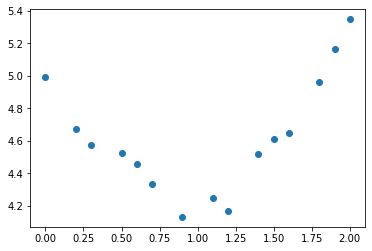

In [32]:
DATA_PATH = "data4.txt"

def input_data(file):
    x_lst = []
    y_lst = []

    with open(file, 'r+') as f:
        for line in f.readlines():
            x0 = float(line.split('\t')[0])
            y0 = float(line.split('\t')[1])

            if x0 in x_lst:
                continue

            x_lst.append(x0)
            y_lst.append(y0)
    
    x_arr = np.array(x_lst)
    y_arr = np.array(y_lst)

    return [x_arr, y_arr]

x, y = input_data(DATA_PATH)
plt.scatter(x, y)
plt.show()

In [30]:
DEGREE_PATH = "degree.txt"

def input_degree(file):
    deg = []

    with open(file, 'r+') as f:
        for line in f.readlines():
            d = int(line[0])
            
            if d >= 0:
                deg.append(d)
    
    return sorted(deg)

deg = input_degree(DEGREE_PATH)
print(deg)

[0, 2, 3, 5]


## Một số mô hình ước lượng

#### Mô hình đa thức
$$
f(x) = a_0+a_1x+a_2x^2+...+a_nx^n
$$

Chú ý khi nhập file degree.txt: Mỗi dòng là bậc của đa thức, không cần theo đúng thứ tự.

Ví dụ đa thức cần ước lượng là $f(x)=a_0+a_3x^3+a_7x^7$, thì file degree.txt sẽ như sau:
```
    0
    3
    7
```

In [7]:
def polynomial(x, y, deg):
    phi = np.zeros(shape=(len(deg), len(x)))

    for i in range(len(deg)):
        for j in range(len(x)):
            phi[i, j] = x[j] ** deg[i]
    
    lhs = phi.dot(np.transpose(phi))
    rhs = phi.dot(np.transpose(y))

    a = np.linalg.inv(lhs).dot(rhs)

    return np.transpose(a)

2.08336636604607*t**3 - 6.18214365452227*t + 10.5562465052097

Sai số đạt được: 0.26476137943431516


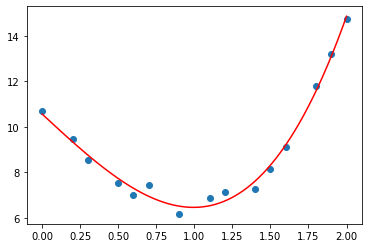

In [26]:
model_params = polynomial(x, y, deg)

expr = make_symbol(model_params, deg, model="polynomial")
display(expr)

err = mean_square_error(x, y, model_params, deg, model="polynomial")
print(f"Sai số đạt được: {err}")

plot_graph(x, y, model_params, model="polynomial")

#### Mô hình lượng giác
$$
f(x) = a_0+a_1\cos(x)+b_1\sin(x)+a_2\cos(2x)+b_2\sin(2x)+...+a_n\cos(nx)+b_n\sin(nx)
$$

Chú ý khi nhập file degree.txt ở dạng hàm này cần nhập theo đúng định dạng sau:
+ Với $\sin(kx)$ thì nhập $2k-1$
+ Với $\cos(kx)$ thì nhập $2k$
+ Nếu có hệ số tự do $a_0$ thì cần nhập 0
+ Thứ tự là không quan trọng

Ví dụ hàm cần ước lượng là $f(x) = a_0 + a_1\cos(x)+b_3\sin(3x)$ thì file degree.txt sẽ có dạng:
```
    0
    2
    5
```

In [8]:
def trigonometry(x, y, deg):
    phi = np.zeros(shape=(len(deg), len(x)))

    if deg[0] == 0:
        phi[0, :] = 1
    
    for i in range(1, len(deg)):
        if deg[i] % 2 == 1:
            real_deg = int(deg[i]/2) + 1
            for j in range(len(x)):
                phi[i, j] = np.sin(real_deg * x[j])
        else:
            real_deg = deg[i]/2
            for j in range(len(x)):
                phi[i, j] = np.cos(real_deg * x[j])
    
    lhs = phi.dot(np.transpose(phi))
    rhs = phi.dot(np.transpose(y))

    a = np.linalg.inv(lhs).dot(rhs)

    return np.transpose(a)

4.64692598419906*sin(t) - 11.1528222629066*sin(2*t) + 11.0773001349924

Sai số đạt được: 0.2322842864412044


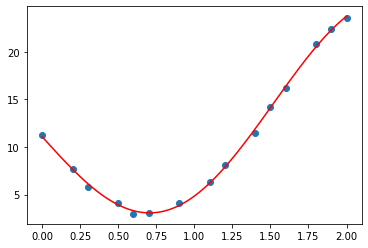

In [28]:
model_params = trigonometry(x, y, deg)

expr = make_symbol(model_params, deg, model="trigonometry")
display(expr)

err = mean_square_error(x, y, model_params, deg, model="trigonometry")
print(f"Sai số đạt được: {err}")

plot_graph(x, y, model_params, model="trigonometry")

#### Mô hình hàm mũ
$$
f(x) = a\times e^{P(x)} \\
\text{trong đó } P(x) = a_1x+a_2x^2+...a_nx^n
$$

Ở mô hình dạng này, ta nhận thấy giá trị của $y$ sẽ chỉ có thể nhận hoặc dương hoặc âm. Vì vậy trong bộ dữ liệu đầu vào nếu số lượng âm dương bị lệch hẳn về một bên thì có thể loại bỏ những giá trị nhiễu và đánh giá với các giá trị còn lại.

Bằng phép logarith tự nhiên 2 vế, ta có:
$$
\ln(y) = \ln(a_0) + a_1x+a_2x^2+...+a_nx^n
$$

Đặt $Y = \ln(y),\hspace{5px} A_0=\ln(a_0),\hspace{5px} A_i = a_i \forall i=1,n$ 

Ta quay trở về dạng đa thức:
$$
Y=A_0+A_1x+A_2x^2+...+A_nx^n
$$

In [9]:
def exponential(x, y, deg):
    sign = np.sign(np.mean(np.sign(y)))
    
    x_lst = []
    y_lst = []

    for i in range(len(x)):
        if np.sign(y[i]) == sign:
            x_lst.append(x[i])
            y_lst.append(y[i])
        else:
            print(f"Removed (x[{i}], y[{i}]) = ({x[i]}, {y[i]}) out of the dataset!")
    
    for i in range(len(x)):
        y_lst[i] = np.log(sign * y_lst[i])
    
    x_arr = np.array(x_lst)
    y_arr = np.array(y_lst)

    a = polynomial(x_arr, y_arr, deg)
    a[0] = np.exp(a[0])
    
    return a

8.03315648847416*exp(0.0837637881268023*t**5 - 0.158460911354894*t**3 - 0.543427638118658*t**2)

Sai số đạt được: 0.8547096264564927


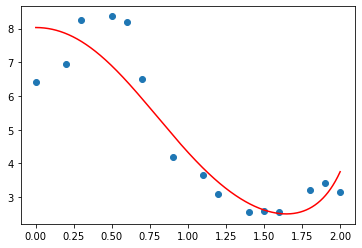

In [31]:
model_params = exponential(x, y, deg)

expr = make_symbol(model_params, deg, model="exponential")
display(expr)

err = mean_square_error(x, y, model_params, deg, model="exponential")
print(f"Sai số đạt được: {err}")

plot_graph(x, y, model_params, model="exponential")

#### Mô hình logarith
$$
f(x) = \ln(a_0+a_1x+a_2x^2+...+a_nx^n)
$$

Bằng phép lấy e 2 vế, ta được:
$$
e^y = a_0+a_1x+a_2x^2+...+a_nx^n
$$

In [16]:
def logarithm(x, y, deg):
    y_arr = np.zeros_like(y)

    for i in range(len(x)):
        y_arr[i] = np.exp(y[i])
    
    a = polynomial(x, y_arr, deg)

    return a

log(-6.1791968329544*t**5 + 122.640931662463*t**3 - 175.663388590452*t**2 + 123.107103061629)

Sai số đạt được: 0.07983299993756272


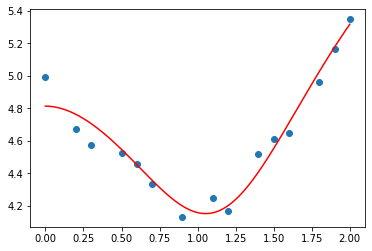

In [33]:
model_params = logarithm(x, y, deg)

expr = make_symbol(model_params, deg, model="logarithm")
display(expr)

err = mean_square_error(x, y, model_params, deg, model="logarithm")
print(f"Sai số đạt được: {err}")

plot_graph(x, y, model_params, model="logarithm")